## Descripción del campo fluido

### Introducción

Vamos a comenzar con un ejemplo sencillo que todos conocemos de representación gráfica de un campo fluido: un mapa de predicción meteorológica 

```{figure} images/Imagen6.png
---
width: 800px
name: cap1-fig6
---
Mapa de vientos donde se muestra el campo vectorial de velocidad.
```
En este mapa, cada una de las flechas es un vector que indica la dirección y la magnitud de la velocidad del viento en cada punto. La velocidad de un flujo se representa matemáticamente mediante un *campo vectorial* que depende del espacio y del tiempo, de la siguiente manera:

$$\vec{\bf{v}}(\vec{\bf{x}},t)=\left(\begin{array}{c}
u(\vec{\bf{x}},t)\\
v(\vec{\bf{x}},t)\\
w(\vec{\bf{x}},t)
\end{array}
\right)$$

donde $\vec{\bf{x}}=(x,y,z)$ es el vector de coordenadas espaciales y $t$ es el tiempo.

Para entender esta idea mejor, vamos a considerar el siguiente campo vectorial en 2 dimensiones, sin dependencia temporal:

$$\vec{\bf{v}}(x,y)=\left(\begin{array}{c}
-2\sin(\pi x) \cos(\pi y) \\
-2\cos(\pi x) \sin(\pi y)
\end{array}
\right)$$

y a realizar su representación gráfica. Para ello, definiremos un conjunto de puntos en el espacio y representaremos el vector velocidad en cada uno de ellos. Escogemos 100 puntos equidistantes en el dominio $[0,1]\times[0,1]$ y obtenemos la siguiente representación.

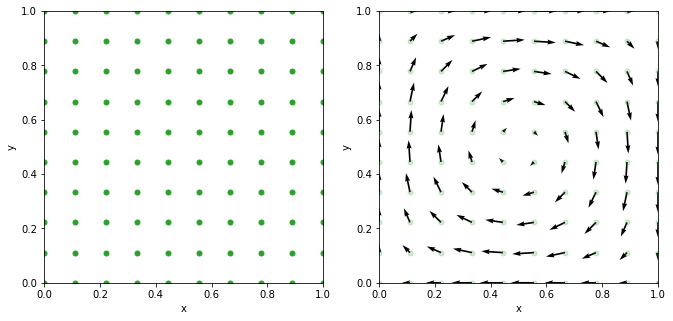

In [1]:
import math
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from myst_nb import glue

nq=1        #separacion entre vectores en quiver plot
N=10
L=1.0
xp = np.linspace(0, L, N)
yp = np.linspace(0, L, N)
X, Y = np.meshgrid(xp, yp)

U = -2*np.sin(np.pi * X ) * np.cos(np.pi * Y)
V =  2*np.cos(np.pi * X ) * np.sin(np.pi * Y)

fig, (ax,ax2) = plt.subplots(1,2,figsize=(11, 5))
ax.plot(X[::nq,::nq],Y[::nq,::nq], '.',color="tab:green", ms=10)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([0, L])
ax.set_xlim([0, L])
ax2.plot(X[::nq,::nq],Y[::nq,::nq], '.',color="tab:green", ms=10, alpha=0.2)
ax2.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_ylim([0, L])
ax2.set_xlim([0, L])
glue("field_fig", fig, display=False)

```{glue:} field_fig
```

Vemos que en cada punto, el vector velocidad tiene una magnitud y una dirección diferente. En este ejemplo particular, el campo vectorial de velocidades representa un flujo en rotación en sentido horario.

### Descripción lagrangiana y euleriana


Siguiendo la hipótesis de medio continuo, el campo fluido se puede modelar como un conjunto de partículas fluidas que se trasladan, rotan y se deforman. Existen dos maneras distintas de describir el movimiento de un fluido:

- **Descripción lagrangiana**: se identifican partículas fluidas y se sigue su movimiento en el espacio. Para cada partícula fluida, que identificamos por su posición inicial $x_0$, la descripción lagrangiana proporciona su posición a lo largo del tiempo: 

 $$\vec{\bf{x}}=\vec{\bf{x}}(t,\vec{\bf{x}}_0), \quad \vec{\bf{v}}(t,\vec{\bf{x}}_0) = \frac{d \vec{\bf{x}}(t,\vec{\bf{x}}_0)}{dt} $$


- **Descripción euleriana**: se identifican puntos fijos del espacio y se obtienen las propiedades del flujo en esos puntos. La descripción euleriana proporciona la velocidad en cualquier punto del espacio a lo largo del tiempo:

 $$  \vec{\bf{v}}= \vec{\bf{v}}(\vec{\bf{x}},t)  $$

A continuación se visualiza la diferencia entre ambas descripciones para un flujo en rotación. A la izquierda, en la descripción lagrangiana se observan la posición de las partículas fluidas en movimiento en el seno del fluido. A la derecha, en la descripción euleriana se muestra la velocidad en puntos fijos del espacio.

In [2]:
from scipy.interpolate import Rbf
from matplotlib import animation
from IPython.display import HTML

nq=2        #separacion entre vectores en quiver plot
N=20
L=1.0
xp = np.linspace(0, L, N)
yp = np.linspace(0, L, N)
X, Y = np.meshgrid(xp, yp)

t=0.0
U = -2*np.sin(np.pi * X + 0.3*np.sin(40*t)) * np.cos(np.pi * Y)
V =  2*np.cos(np.pi * X + 0.3*np.sin(40*t)) * np.sin(np.pi * Y)

fig, (ax,ax2) = plt.subplots(1,2,figsize=(10, 5))
Q = ax.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq],alpha=0.1)

XP=np.zeros((200, 2))
for i in range (20):
    for j in range (10):
        k=i*10+j
        XP[k,0]=2*(0.05*i+0.02+np.random.rand(1,1)*0.02)
        XP[k,1]=2*(0.05*j+0.02+np.random.rand(1,1)*0.02)

pt1, = ax.plot([], [], '.',color="tab:orange", ms=15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([0, L])
ax.set_xlim([0, L])
ax.set_title("Descripción Lagrangiana")


ax2.plot(X[::nq,::nq],Y[::nq,::nq], '.',color="tab:green", ms=15)
Q2 = ax2.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_ylim([0, L])
ax2.set_xlim([0, L])
ax2.set_title("Descripción Euleriana")
plt.tight_layout()

plt.close()

nframes=150    #frames de la animacion
tf=2*math.pi/20        #tiempo total
dt=tf/nframes #paso de tiempo

def update_plot(num):
    t = dt*num
    dx=t*2.0
    U = -2*np.sin(np.pi * X + 0.3*np.sin(40*t)) * np.cos(np.pi * Y)
    V =  2*np.cos(np.pi * X + 0.3*np.sin(40*t)) * np.sin(np.pi * Y)
    Q.set_UVC(U[::nq,::nq],V[::nq,::nq])
    Q2.set_UVC(U[::nq,::nq],V[::nq,::nq])
    interpx = Rbf(X, Y, U)
    interpy = Rbf(X, Y, V)
    XP[:,0] = XP[:,0] + interpx(XP[:,0],XP[:,1])*dt
    XP[:,1] = XP[:,1] + interpy(XP[:,0],XP[:,1])*dt
    pt1.set_data(XP[:,0],XP[:,1])
    ax.plot(XP[:,0],XP[:,1], '.',color="tab:orange", ms=1,alpha=0.2)
    return

anim = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=60, blit=False)  

In [3]:
HTML(anim.to_html5_video()) 

Cualquier propiedad del flujo (velocidad, temperatura, presión, densidad…) se puede expresar en un contexto lagrangiano o euleriano. Por ejemplo, si queremos conocer la temperatura en un río $T$, podemos hacerlo de dos maneras distintas:

- Colocar un termómetro en un pequeño barco que viaje a la velocidad del flujo (solidario a una partícula fluida) que ha pasado por $\vec{\bf{x}}_0$, y registrar la temperatura que va midiendo conforme se transporta (contexto lagrangiano): 

$$ T=T(t,\vec{\bf{x}}_0) $$

- Colgar un termómetro desde un puente y registrar la temperatura en un punto fijo $\vec{\bf{x}}$ a lo largo del tiempo (contexto euleriano):

$$ T=T(\vec{\bf{x}},t) $$

```{figure} images/Imagen5.png
---
width: 500px
name: cap1-fig5
---
Descripción lagrangiana vs euleriana.
```


Consideremos ahora este ejemplo: al río de la explicación anterior se está virtiendo un producto contaminante a alta temperatura, como se muestra en la siguiente figura: 


```{figure} images/Imagen7.png
---
width: 500px
name: cap1-fig7
---
Partícula fluida de volumen $\delta V$.
```

Para simplificar, vamos a suponer que el río se define en un dominio rectangular con 2 metros de ancho y 10 metros de largo, que la velocidad del flujo es $u=1$ m/s y que la distribución de temperatura en el río viene dada por
$ T(x,y)=\sin (\pi x/10) \sin (\pi y/2)$.

A continuación se muestra una animación de la medida de temperatura que realiza el observador que está en el puente en $\vec{\bf{x}}=(2.5,1) $ (punto verde, contexto euleriano) y del observador montado en el barco arrastrado por el flujo que ha salido de $\vec{\bf{x}}_0=(0,1) $ (punto naranja, contexto lagrangiano). El barco, que se mueve con el flujo, hace el papel de una **partícula fluida**. 


In [4]:
nq=2        #separacion entre vectores en quiver plot
Nx=20
Ny=8
Lx=10.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

t=0.0
U = 1.0*np.ones(np.shape(X))
V = np.zeros(np.shape(X))

def temp(x,y):
    return np.sin(np.pi * x/Lx)*np.sin(np.pi * y/Ly)

ypos=1.0
XP=[0,ypos]

fig, (ax,ax2,ax3) = plt.subplots(3,1,figsize=(10, 7.5))
ax.contourf(X,Y,temp(X,Y),256,cmap="coolwarm")
Q = ax.quiver(X[1:Ny-1,:], Y[1:Ny-1,:], U[1:Ny-1,:], V[1:Ny-1,:],alpha=0.4)

pt1, = ax.plot([], [], '.',color="tab:orange", ms=20,markeredgecolor="k")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([Lx/4,Lx/4],[-0.2*Ly, 1.2*Ly], 'k-',linewidth=0.8)
ax.plot([1.05*Lx/4,1.05*Lx/4],[-0.2*Ly, 1.2*Ly], 'k-',linewidth=0.8)
ax.plot(Lx/4,ypos,'.',color="tab:green", ms=20,markeredgecolor="k")
rect1 = plt.Rectangle((Lx/4, -0.2*Ly), 0.05*Lx/4, 1.4*Ly, color='gray')
ax.add_patch(rect1)
ax.set_title("Distribución de temperatura y posición de los observadores")

T1D=temp(xp,ypos)
ax2.plot(xp, T1D, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("T")
ax2.set_xlim([0, Lx])
ax2.set_title("Distribución de temperatura a lo largo del eje del río")

nframes=200    #frames de la animacion
tf=10        #tiempo total
dt=tf/nframes #paso de tiempo

ax3.set_xlabel("t")
ax3.set_ylabel("T")
ax3.set_ylim([0, 1.0])
ax3.set_xlim([0, tf])
ax3.set_title("Temperatura medida por los observadores")

plt.tight_layout()
plt.close()

def update_plot(num):
    t = dt*num
    dx=t*2.0
    interpx = Rbf(X, Y, U)
    interpy = Rbf(X, Y, V)
    XP[0] = XP[0] + interpx(XP[0],XP[1])*dt
    XP[1] = XP[1] + interpy(XP[0],XP[1])*dt
    pt1.set_data(XP[0],XP[1])
    ax.plot(XP[0],XP[1], '.',color="tab:orange", ms=1,alpha=0.8)
    ax3.plot(t,temp(XP[0],XP[1]),'.',color="tab:orange", ms=6)
    ax3.plot(t,temp(Lx/4,ypos),'.',color="tab:green", ms=6)
    return

anim = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=100, blit=False)  

In [5]:
HTML(anim.to_html5_video()) 

La línea naranja es la temperatura de una partícula fluida (barco) que sale de  $\vec{\bf{x}}_0=(0,1)$. Vemos que conforme avanza el tiempo, la partícula fluida se desplaza hacia la zona de mayor temperatura ($x=5$) y después sigue hacia una zona de menor temperatura ($x=10$). Por otro lado, la línea verde representa la temperatura medida en el puente, que permanece constante a lo largo del tiempo ya que $T(x,y)$ no depende del tiempo.

A la vista del ejemplo anterior, es evidente que aunque $T(x,y)$ no depende del tiempo, **la temperatura de la partícula fluida sí que varía en el tiempo debido a su desplazamiento en el seno del fluido**. 

Entonces... ¿cómo podemos calcular la variación de la temperatura siguiendo una partícula fluida?

### Derivada siguiendo una partícula fluida: derivada material

Para continuar con el ejemplo anterior, vamos a considerar que la variable de interés es la temperatura, $T$, aunque este análisis se puede realizar para cualquier variable fluida. La temperatura vendrá dada de forma general en un contexto euleriano como una función que puede depender del espacio y del tiempo, $T=T(\vec{\bf{x}},t)$.

Para calcular la variación de la temperatura siguiendo una partícula fluida, vamos a expresar primero la posición de una partícula fluida $p$ como $\vec{\bf{x}}_p(t,\vec{\bf{x}}_0)$, donde $\vec{\bf{x}}_0$ es el punto de partida de dicha partícula fluida. Ahora, podemos expresar la temperatura de dicha partícula fluida en función de su posición, evaluando la función temperatura en la posición de la partícula fluida:

$$T_p=T(\vec{\bf{x}}_p(t,\vec{\bf{x}}_0),t)$$

que también se puede escribir como

$$T_p=T(x_p(t,x_0),y_p(t,y_0),z_p(t,z_0),t)$$

La derivada de $T_p$ respecto del tiempo, también llamada **derivada material o derivada total** y denotada por $\frac{D }{Dt}$ , representa la derivada de la temperatura siguiendo una partícula fluida y se calculará aplicando la regla de la cadena, ya que la posición también depende del tiempo. Por simplicidad vamos a omitir el subindice $p$, y aplicando la regla de la cadena se obtiene:

$$\frac{D T}{Dt}=\frac{\partial T}{\partial t} +  \frac{\partial T}{\partial x}\frac{d x}{d t} +\frac{\partial T}{\partial y}\frac{d y}{d t}  + \frac{\partial T}{\partial z}\frac{d z}{d t}  $$

donde $\frac{d x}{d t}=u$, $\frac{d y}{d t}=v$, $\frac{d z}{d t}=w$, pudiendo escribir

$$\frac{D T}{Dt}=\frac{\partial T}{\partial t} +  u\frac{\partial T}{\partial x} + v\frac{\partial T}{\partial y}  + w\frac{\partial T}{\partial z} $$


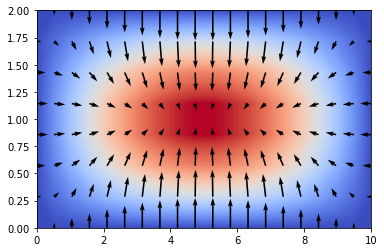

In [6]:
z = temp(X,Y)
dy, dx = np.gradient(z)
fig, ax = plt.subplots()
ax.contourf(X,Y,z,256,cmap="coolwarm")
ax.quiver(X,Y,dx,dy)
glue("gradient_fig", fig, display=False)

````{margin} Gradiente de $T$
El gradiente de $T(x,y)$ es un vector en cuyas componentes tenemos las derivadas parciales de $T$ respecto de las distintas coordenadas espaciales:

$$\nabla T=\left(\begin{array}{c}
\frac{\partial T}{\partial x}\\
\frac{\partial T}{\partial y}\\
\frac{\partial T}{\partial z}
\end{array}
\right)$$

```{glue:} gradient_fig
```

````


```{admonition} Derivada material
:class: tip
La derivada material o total de una propiedad definida en un contexto euleriano (p. ej. la temperatura $T=T(\vec{\bf{x}},t)$) representa la derivada de dicha propiedad siguiendo una partícula fluida y se calcula de la siguiente manera

$$\frac{D T}{Dt}=\frac{\partial T}{\partial t} +  \vec{\bf{v}}\cdot \nabla T $$

que se compone de dos términos:

- Derivada local $\frac{\partial T}{\partial t}$: es la derivada parcial de la temperatura respecto de $t$. 

- Derivada convectiva $\vec{\mathbf{v}}\cdot\nabla T$:  es la derivada direccional de $T$ en la dirección de la velocidad. Se calcula mediante el producto escalar entre el vector velocidad del flujo  $\vec{\mathbf{v}}$ y el vector gradiente espacial de la temperatura $\nabla T$.

Nótese que la derivada material se expresará también en un contexto euleriano, $\frac{D T}{Dt}(\vec{\bf{x}},t)$, es decir, para un punto determinado del dominio espacial y para un tiempo concreto. 
```


Consideremos el ejemplo anterior en el que $u=1$, $v=w=0$, $\frac{\partial T}{\partial x}= 0.1\pi\cos (0.1\pi x) \sin (\pi y/2)$, $\frac{\partial T}{\partial t}=0$, donde la derivada total será

$$\frac{D T}{Dt}=0 +  1\cdot 0.1\pi\cos (0.1\pi x) \sin (\pi y/2) + 0  + 0 $$

que nos permite calcular la variación total de la temperatura (siguiendo una partícula fluida) en cualquier punto del dominio $(x,y)$.

A continuación se muestra una representación gráfica de la temperatura y de su derivada material a lo largo del eje longitudinal del canal. Además, se muestra que la derivada material representa la pendiente de la recta tangente a la curva  en la gráfica $(t,T)$, representada en rojo.

In [7]:
nq=2        #separacion entre vectores en quiver plot
Nx=20
Ny=8
Lx=10.0
Ly=2.0
xp = np.linspace(0, Lx, Nx)
yp = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(xp, yp)

t=0.0
U = 1.0*np.ones(np.shape(X))
V = np.zeros(np.shape(X))

def temp(x,y):
    return np.sin(np.pi * x/Lx)*np.sin(np.pi * y/Ly)

def DDttemp(x,y):
    return 0.1*np.pi*np.cos(np.pi * x/Lx)*np.sin(np.pi * y/Ly)

ypos=1.0
XP=[0,ypos]

fig, (ax,ax2,ax3) = plt.subplots(3,1,figsize=(10, 7.5))
ax.contourf(X,Y,temp(X,Y),256,cmap="coolwarm")
Q = ax.quiver(X[1:Ny-1,:], Y[1:Ny-1,:], U[1:Ny-1,:], V[1:Ny-1,:],alpha=0.4)

pt1, = ax.plot([], [], '.',color="tab:orange", ms=20,markeredgecolor="k")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([-0.15*Ly, 1.15*Ly])
ax.set_xlim([0, Lx])
ax.plot([Lx/4,Lx/4],[-0.2*Ly, 1.2*Ly], 'k-',linewidth=0.8)
ax.plot([1.05*Lx/4,1.05*Lx/4],[-0.2*Ly, 1.2*Ly], 'k-',linewidth=0.8)
ax.plot(Lx/4,ypos,'.',color="tab:green", ms=20,markeredgecolor="k")
rect1 = plt.Rectangle((Lx/4, -0.2*Ly), 0.05*Lx/4, 1.4*Ly, color='gray')
ax.add_patch(rect1)
ax.set_title("Distribución de temperatura y posición de los observadores")


nframes=200    #frames de la animacion
tf=10        #tiempo total
dt=tf/nframes #paso de tiempo

line, = ax2.plot([], [],'-',color="tab:red",lw=4)
ax2.set_xlabel("t")
ax2.set_ylabel("T")
ax2.set_ylim([0, 1.0])
ax2.set_xlim([0, tf])
ax2.set_title("Temperatura de la partícula fluida")

DT1D=DDttemp(xp,ypos)
ax3.plot(xp, DT1D, 'k')
ax3.set_xlabel("t")
ax3.set_ylabel("$DT/Dt$")
ax3.set_ylim([-0.4, 0.4])
ax3.set_xlim([0, tf])
ax3.set_title("Derivada material de la temperatura")

plt.tight_layout()
plt.close()

Told=0.0
def update_plot(num):
    global Told
    t = dt*num
    dx=t*2.0
    interpx = Rbf(X, Y, U)
    interpy = Rbf(X, Y, V)
    XP[0] = XP[0] + interpx(XP[0],XP[1])*dt
    XP[1] = XP[1] + interpy(XP[0],XP[1])*dt
    pt1.set_data(XP[0],XP[1])
    ax.plot(XP[0],XP[1], '.',color="tab:orange", ms=1,alpha=0.8)
    ax2.plot(t,temp(XP[0],XP[1]),'.',color="tab:orange", ms=6)
    slope=(temp(XP[0],XP[1])-Told)/dt
    Told=temp(XP[0],XP[1])
    #ax2.plot([t-5*dt,t+5*dt],[temp(XP[0],XP[1])-slope*5*dt,temp(XP[0],XP[1])+slope*5*dt],'-',color="tab:red")
    line.set_data([t-8*dt,t+8*dt],[temp(XP[0],XP[1])-slope*8*dt,temp(XP[0],XP[1])+slope*8*dt])
    ax3.plot(t,slope,'.',color="tab:red", ms=6)
    return

anim = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=100, blit=False)  

In [8]:
HTML(anim.to_html5_video()) 

```{admonition} A recordar...
:class: note
La derivada convectiva $\vec{\mathbf{v}}\cdot\nabla T$  es la derivada direccional de $T$ en la dirección de la velocidad. Se calcula mediante el producto escalar entre el vector velocidad del flujo  $\vec{\mathbf{v}}$ y el vector gradiente espacial de la temperatura $\nabla T$. Este producto **será máximo si la velocidad del flujo está alineada con la dirección de máxima variación de** $T$, mientras que **será mínimo si es perpendicular a dicha dirección** (es decir, si la velocidad del flujo sigue una línea isoterma, en este ejemplo).

```

A continuación se muestra una manera sencilla de calcular el gradiente y la derivada total de la temperatura mediante Python utilizando las funciones ```grad()``` y ```DDt()``` para el siguiente campo de temperatura:

$$ T=xy+z^2+6t $$

y de velocidades

$$ \mathbf{v}=(x,zy,t). $$


In [20]:
from sympy import*

x, y, z, t = symbols('x y z t')

def grad(f):
    g_x=f.diff(x)
    g_y=f.diff(y)
    g_z=f.diff(z)
    return g_x,g_y,g_z

def DDt(f):
    return f.diff(t)+u*f.diff(x)+v*f.diff(y)+w*f.diff(z)

u=x
v=z*y
w=2*t

T=x*y+z**2+6*t

print("La derivada total de la temperatura es:")
print("DT/dt=",DDt(T))
print("... y si la evaluamos en el punto (5,-3,1) en el tiempo t=2:")
point={x:5,y:-3,z:1,t:2}
print("DT/dt(5,-3,1,2)=",DDt(T).subs(point))

print("El vector gradiente de T(x,y) es:")
print(grad(T))



La derivada total de la temperatura es:
DT/dt= 4*t*z + x*y*z + x*y + 6
... y si la evaluamos en el punto (5,-3,1) en el tiempo t=2:
DT/dt(5,-3,1,2)= -16
El vector gradiente de T(x,y) es:
(y, x, 2*z)
La divergencia del flujo es:
z + 1
El rotacional del flujo es:
(-y, 0, 0)
